In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
import pylab as plt
from scipy.stats import pearsonr

In [2]:
assi = np.load("/work/uo1075/u241321/data/eemd_t310_assi_Norwegian.npy")[2,:]
hind  = np.load("/work/uo1075/u241321/data/hind_eemd_t_80.npy")[2,:,:] # (5,9,50,10) mode(input, c1-c4), station, time, lead year

na = np.load("/work/uo1075/u241321/data/eemd_NAO_DJF_dt.npy")   # linearly detrened 
nao=na[2,:]+na[3,:]+na[4,:]

na_h = np.load("/work/uo1075/u241321/data/eemd_NAO_DJF_ly1_hind80_dt.npy") 
nao_h=na_h[2,:]+na_h[3,:]+na_h[4,:]

# from sklearn import preprocessing
# y = preprocessing.scale(y)
# x = preprocessing.scale(x)
# assi

In [3]:
referx=np.linspace(-0.2,0.2)
# pred.shape

In [4]:
acc = np.zeros((3)) # weak/strong/neutral; mode(input, c1-c4), station, lead year

y = nao   
ny = 50
events = np.zeros((ny))
w=-1
ne=0
strong=1
marksize = np.zeros((50))
color = []
s=50
l=300

ly = 5


for i in range(0,ny-ly,1):
    if y[i] <= sorted(y)[14]:
        events[i+ly] = w
        color.append('blue')
        marksize[i+ly] = l
    elif y[i] >= sorted(y)[-15]:
        events[i+ly] = strong
        color.append('orangered')
        marksize[i+ly] = l
    else:
                events[i+ly] = ne  
                color.append('black')
                marksize[i+ly] = s
                
acc[0] = np.corrcoef(assi[ly::][events[ly::]==w], hind[ly::,ly][events[ly::]==w])[0,1]
acc[1] = np.corrcoef(assi[ly::][events[ly::]==strong], hind[ly::,ly][events[ly::]==strong])[0,1]
acc[2] = np.corrcoef(assi[ly::][events[ly::]==ne], hind[ly::,ly][events[ly::]==ne])[0,1]


In [5]:
events

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0., -1.,
       -1., -1., -1., -1.,  0.,  0.,  0.,  0., -1., -1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  0., -1., -1.,  0.,  1.,  0.,  0., -1., -1.,
       -1.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  1.,  1.])

In [6]:
marksize

array([  0.,   0.,   0.,   0.,   0.,  50.,  50.,  50., 300., 300., 300.,
        50., 300., 300., 300., 300., 300.,  50.,  50.,  50.,  50., 300.,
       300.,  50., 300., 300., 300., 300., 300., 300.,  50., 300., 300.,
        50., 300.,  50.,  50., 300., 300., 300.,  50.,  50.,  50.,  50.,
       300., 300., 300.,  50., 300., 300.])

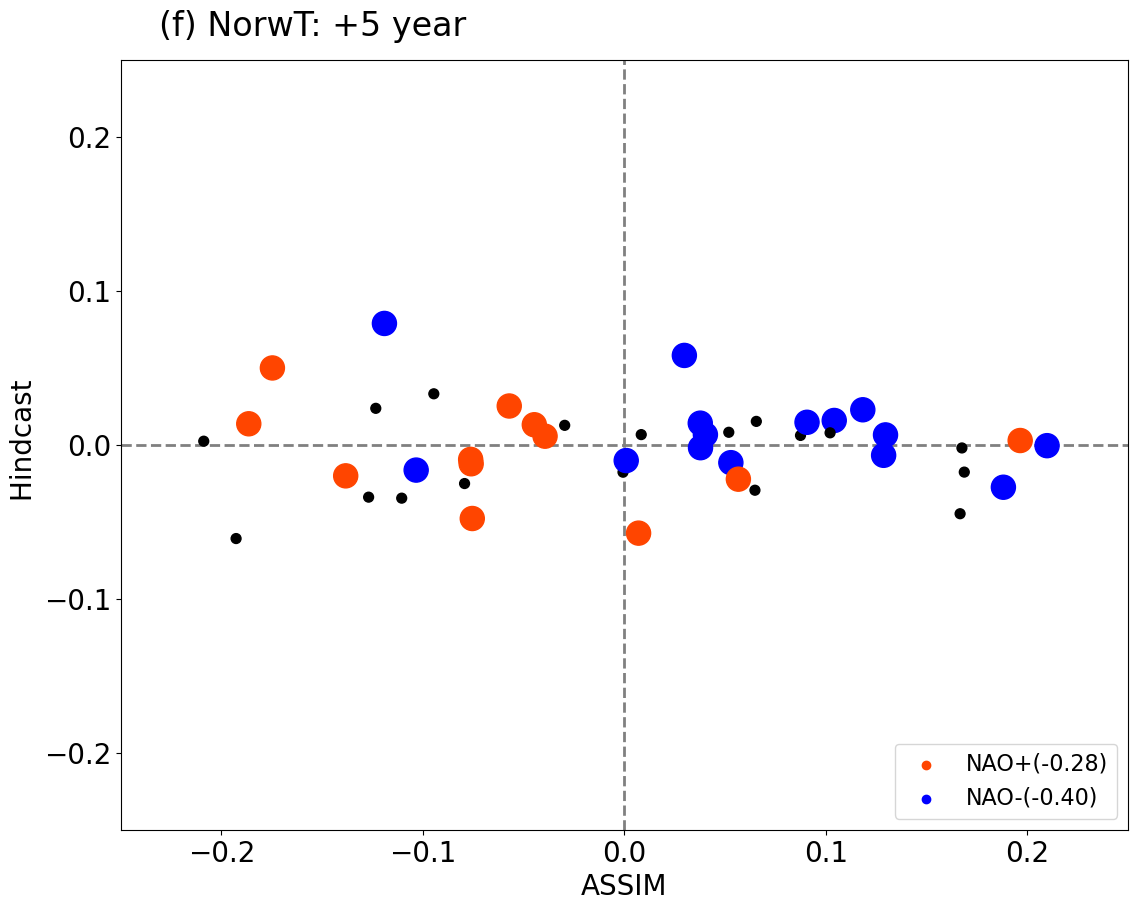

In [8]:
x = nao   # C2
pred = hind[5::,5]


fig, ax = plt.subplots(figsize = [13,10])

# ax.plot(referx, referx, '-', linestyle='dashed', color='gray', linewidth=2, markersize=10, label = '',zorder=-1)

ax.scatter(assi[5::], pred,  marksize[5::], color, zorder=1)

ax.scatter(1, 1,  color='orangered', label = 'NAO+(-0.28)')
ax.scatter(1, 1,  color='blue', label = 'NAO-(-0.40)')

ax.axhline(0, linewidth=2, color='gray', linestyle= 'dashed',zorder=-1)
ax.axvline(0, linewidth=2, color='gray', linestyle= 'dashed',zorder=-1)
ax.set(xlabel='ASSIM', ylabel=' Hindcast',
       title=' ')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
fig.suptitle('(f) NorwT: +5 year', x=0.273, y=0.93, fontsize=24)

# ax.grid()
ax.legend(loc='lower right', fontsize='16')
# ax.annotate('5%', fontsize='16',
#             xy=(80, 150), xycoords='figure points')

plt.rcParams["font.size"] = "20"
plt.show()
fig.savefig('/work/uo1075/u241321/results/prediction_NAO5.pdf')